In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import model_selection, preprocessing, linear_model, pipeline

import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/abulbasar/data/master/Combined_Cycle_Power_Plant.csv")
df.head()

,AT,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


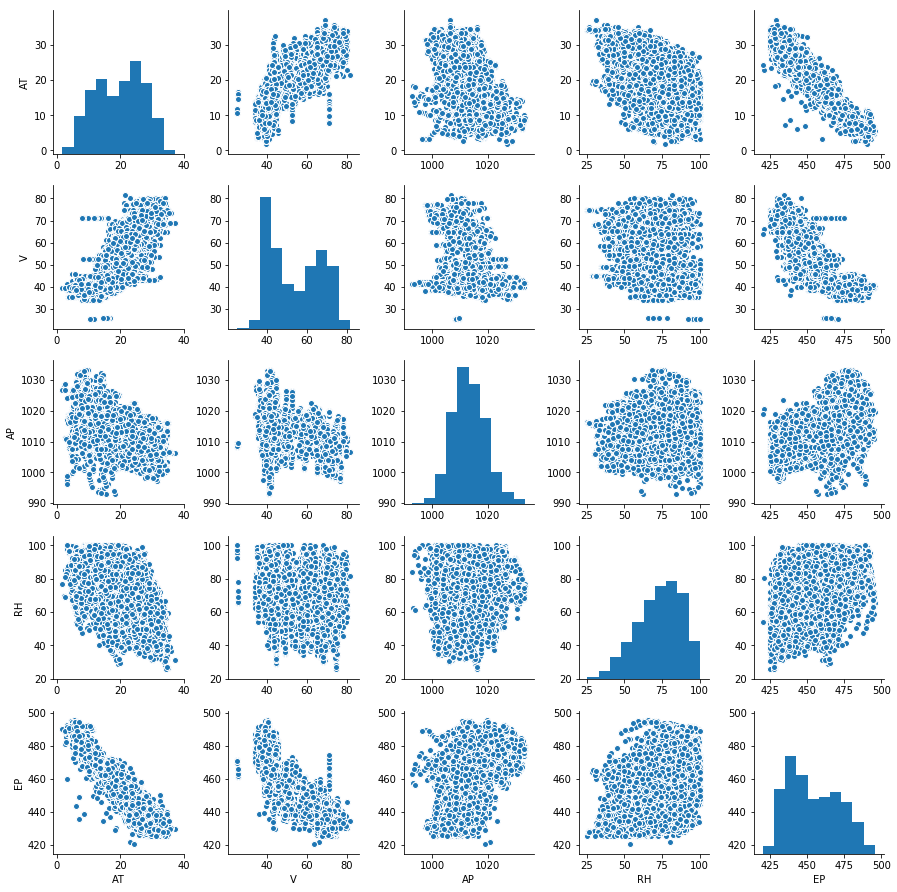

In [4]:
sns.pairplot(df)

In [5]:
y = df.EP
X = df.iloc[:, :-1]

In [6]:
X["V2"] = X.V ** 2
X.head()

,AT,V,AP,RH,V2
0,14.96,41.76,1024.07,73.17,1743.8976
1,25.18,62.96,1020.04,59.08,3963.9616
2,5.11,39.40,1012.16,92.14,1552.3600
3,20.86,57.32,1010.24,76.64,3285.5824
4,10.82,37.50,1009.23,96.62,1406.2500


In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                    test_size = 0.3, random_state = 1)

In [9]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [12]:
lr = linear_model.LinearRegression()
lr.fit(X_train_std, y_train)
lr.score(X_test_std, y_test)

0.93004577728512461

In [14]:
pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.LinearRegression())
])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.93004577728512461

In [46]:
y = df.EP
X = df.iloc[:, :-1]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                    test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 2, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.LinearRegression())
])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.93776100165600873

In [47]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=True)
poly.fit_transform(np.array([
    [1, 2, 3],
    [0, -3, 1],
    [4, 2, 6],
    [5, -2, 1]
]))

array([[  1.,   1.,   2.,   3.,   1.,   2.,   3.,   4.,   6.,   9.],
       [  1.,   0.,  -3.,   1.,   0.,  -0.,   0.,   9.,  -3.,   1.],
       [  1.,   4.,   2.,   6.,  16.,   8.,  24.,   4.,  12.,  36.],
       [  1.,   5.,  -2.,   1.,  25., -10.,   5.,   4.,  -2.,   1.]])

In [48]:
0.3 - 0.1

0.19999999999999998

In [49]:
pipe.steps[2][1].coef_

array([-39.03876074, -39.41735989,  90.27285809,  58.64709953,
         4.49867196,   7.91064095,  19.44011747,  -3.04987273,
        -2.01337321,  33.50012925,   0.6564316 , -89.09814251,
       -55.1557508 ,  -3.92054161])

In [37]:
y = df.EP
X = df.iloc[:, :-1]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                    test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 2, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.Lasso(alpha=0.1))
])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.93156504067078783

In [38]:
pipe.steps

[('poly',
  PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)),
 ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('lr', Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
     normalize=False, positive=False, precompute=False, random_state=None,
     selection='cyclic', tol=0.0001, warm_start=False))]

In [39]:
pipe.steps[2][1].coef_

array([ -1.06268348e+01,  -2.83311972e+00,   3.23151274e-01,
         0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
        -5.22608062e-04,  -3.61953386e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00])

In [40]:
y = df.EP
X = df.iloc[:, :-1]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                    test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 2, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.Ridge(alpha=0.1))
])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.93768477176314291

In [41]:
pipe.steps[2][1].coef_

array([-53.50660436, -34.20639158,  62.17585279,  42.6466298 ,
         4.63426398,   7.71387259,  33.36906328,  -2.68822957,
        -2.06507466,  28.65087287,   0.47466695, -61.55110958,
       -39.43105361,  -3.69435013])

In [44]:
y = df.EP
X = df.iloc[:, :-1]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                    test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree = 2, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("lr", linear_model.ElasticNet(alpha=0.1, l1_ratio=0.45))
])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.93006153671511582

In [45]:
pipe.steps[2][1].coef_

array([-3.98918305, -1.19305206,  0.31653378,  0.55072628, -0.58662081,
       -0.79323373, -3.99646114, -4.20578469, -0.10563164, -1.20225395,
       -0.57933532,  0.30107378,  0.56391833,  0.        ])